In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
qpr = pd.read_csv('../datasets/qpr_combined.csv')
qpr_p = pd.read_csv('../datasets/qpr_posts.csv')

In [3]:
liv = pd.read_csv('../datasets/liv_final.csv')

In [116]:
qpr_one = pd.read_csv('../datasets/qpr_one_word.csv')
liv_one = pd.read_csv('../datasets/liv_one.csv')

In [4]:
qpr

,subreddit,body,length,post_date
0,superhoops,Calls him a disgrace but still says he's a goo...,24,2011-09-26
1,superhoops,BBC - Football Tactics: Goal-shy QPR in need o...,11,2011-09-26
2,superhoops,"26 Sept 2011: 'If you are hurting inside, you ...",37,2011-09-26
3,superhoops,"This is a great resource, which I've been usin...",34,2011-09-26
4,superhoops,Warnock unhappy with refereeing decisions in g...,12,2011-09-26
...,...,...,...,...
8471,superhoops,get yourself a decent striker as soon as possi...,9,2023-03-25
8472,superhoops,"done a few, unlike irl dykes is actually quite...",46,2023-03-25
8473,superhoops,Sign Taraabt again,3,2023-03-25
8474,superhoops,I’d start with all of them and see where that ...,12,2023-03-25


In [5]:
qpr = qpr[qpr.length > 5]

In [6]:
liv

,subreddit,body,score,length,num_comments,date posted,id
0,LiverpoolFC,Maybe the England lads were a diversion?,1.0,7,0,2023-03-27 22:13:10,1242m5s
1,LiverpoolFC,Jude Bellingham would be unbelievable for Live...,1.0,10,0,2023-03-27 21:56:08,12422ji
2,LiverpoolFC,Henderson: ‘He (Jude Bellingham) can go as hig...,1.0,50,0,2023-03-27 21:51:21,1241x6w
3,LiverpoolFC,[David Ornstein] Liverpool yet to open contrac...,1.0,45,0,2023-03-27 18:07:27,123v550
4,LiverpoolFC,[Giannis Chorianopoulos] Tsimikas is out after...,1.0,21,0,2023-03-27 16:27:40,123s7pk
...,...,...,...,...,...,...,...
225193,LiverpoolFC,SInce the Liverpool is undoubtedly hitting som...,4.0,86,13,2010-11-08 19:00:43,e31m1
225194,LiverpoolFC,Leivinho bossing the game against Chelsea (vid),11.0,7,6,2010-11-08 15:07:42,e2xqs
225195,LiverpoolFC,Rumor: Christian Poulsen Set for January Exit,6.0,7,6,2010-11-08 14:41:40,e2xdl
225196,LiverpoolFC,"My MOTM. At 23 years old, if he can keep putti...",12.0,31,12,2010-11-07 22:38:51,e2n90


In [7]:
qpr_p

,subreddit,selftext,score,length,num_comments,utc_datetime_str,id
0,superhoops,Hey guys. I’m making a Queens Park Rangers Car...,1,35,0,2023-03-25,121vebo
1,superhoops,Gareth Ainsworth: EFL financial woes not helpe...,1,12,0,2023-03-22,11yaovc
2,superhoops,Watford lose Wilder's first game as Rangers en...,1,11,0,2023-03-12,11p6t24
3,superhoops,Wesley Hoedt refuses to shake hands with Garet...,1,12,0,2023-03-11,11opn12
4,superhoops,Tyler Roberts returning to Leeds to review inj...,1,17,0,2023-03-10,11nchpj
...,...,...,...,...,...,...,...
3137,superhoops,Wonder what he has on QPR for the 23rd.\n\nFro...,1,82,0,2011-09-28,kufkn
3138,superhoops,BBC - Football Tactics: Goal-shy QPR in need o...,1,11,0,2011-09-26,ks88o
3139,superhoops,"26 Sept 2011: 'If you are hurting inside, you ...",1,37,0,2011-09-26,ks2t3
3140,superhoops,"Open All R's: A fairly new, independent weekly...",3,28,1,2011-09-26,krxxx


In [8]:
qpr_p.rename(columns = {
    'selftext' : 'body',
    'utc_datetime_str' : 'date_posted'
}, inplace = True)

In [9]:
qpr_p

,subreddit,body,score,length,num_comments,date_posted,id
0,superhoops,Hey guys. I’m making a Queens Park Rangers Car...,1,35,0,2023-03-25,121vebo
1,superhoops,Gareth Ainsworth: EFL financial woes not helpe...,1,12,0,2023-03-22,11yaovc
2,superhoops,Watford lose Wilder's first game as Rangers en...,1,11,0,2023-03-12,11p6t24
3,superhoops,Wesley Hoedt refuses to shake hands with Garet...,1,12,0,2023-03-11,11opn12
4,superhoops,Tyler Roberts returning to Leeds to review inj...,1,17,0,2023-03-10,11nchpj
...,...,...,...,...,...,...,...
3137,superhoops,Wonder what he has on QPR for the 23rd.\n\nFro...,1,82,0,2011-09-28,kufkn
3138,superhoops,BBC - Football Tactics: Goal-shy QPR in need o...,1,11,0,2011-09-26,ks88o
3139,superhoops,"26 Sept 2011: 'If you are hurting inside, you ...",1,37,0,2011-09-26,ks2t3
3140,superhoops,"Open All R's: A fairly new, independent weekly...",3,28,1,2011-09-26,krxxx


In [10]:
liv.rename(columns = {
    'date posted' : 'date_posted'
}, inplace = True)

In [11]:
liv.date_posted = liv.date_posted.str[:10]

In [12]:
liv_p = liv

In [13]:
qpr_liv_posts = pd.concat((liv_p, qpr_p), axis = 0)

In [14]:
qpr_liv_posts

,subreddit,body,score,length,num_comments,date_posted,id
0,LiverpoolFC,Maybe the England lads were a diversion?,1.0,7,0,2023-03-27,1242m5s
1,LiverpoolFC,Jude Bellingham would be unbelievable for Live...,1.0,10,0,2023-03-27,12422ji
2,LiverpoolFC,Henderson: ‘He (Jude Bellingham) can go as hig...,1.0,50,0,2023-03-27,1241x6w
3,LiverpoolFC,[David Ornstein] Liverpool yet to open contrac...,1.0,45,0,2023-03-27,123v550
4,LiverpoolFC,[Giannis Chorianopoulos] Tsimikas is out after...,1.0,21,0,2023-03-27,123s7pk
...,...,...,...,...,...,...,...
3137,superhoops,Wonder what he has on QPR for the 23rd.\n\nFro...,1.0,82,0,2011-09-28,kufkn
3138,superhoops,BBC - Football Tactics: Goal-shy QPR in need o...,1.0,11,0,2011-09-26,ks88o
3139,superhoops,"26 Sept 2011: 'If you are hurting inside, you ...",1.0,37,0,2011-09-26,ks2t3
3140,superhoops,"Open All R's: A fairly new, independent weekly...",3.0,28,1,2011-09-26,krxxx


In [46]:
qpr_p.num_comments.mean()

3.0642902609802674

In [47]:
liv_p.num_comments.mean()

30.281592198865

In [15]:
qpr_p_tot = len(qpr_p)
liv_p_tot = len(liv_p)

In [16]:

def posts_per_year(date_col):
    team_dict = {}
    for year in date_col.str[:4].sort_values(ascending = True).unique():
        team_dict[year] = len(date_col[date_col.str[:4] == year])
    return team_dict

In [17]:
liv_dict = posts_per_year(liv_p.date_posted)

In [18]:
liv_dict

{'2010': 85,
 '2011': 1870,
 '2012': 7113,
 '2013': 11781,
 '2014': 20264,
 '2015': 19803,
 '2016': 20258,
 '2017': 26130,
 '2018': 38203,
 '2019': 35777,
 '2020': 23446,
 '2021': 14843,
 '2022': 2081,
 '2023': 3544}

In [19]:
qpr_dict = posts_per_year(qpr_p.date_posted)

In [20]:
qpr_dict

{'2011': 49,
 '2012': 341,
 '2013': 421,
 '2014': 667,
 '2015': 554,
 '2016': 331,
 '2017': 191,
 '2018': 129,
 '2019': 141,
 '2020': 145,
 '2021': 109,
 '2022': 17,
 '2023': 47}

In [21]:
sns.set_style(None)

In [22]:
liv_positions = {
    '2010' : 7,
    '2011' : 6,
    '2012' : 8,
    '2013' : 7,
    '2014' : 2,
    '2015' : 6,
    '2016' : 8,
    '2017' : 4,
    '2018' : 4,
    '2019' : 2,
    '2020' : 1,
    '2021' : 3,
    '2022' : 2,
    '2023' : 6
}
qpr_positions = {
    '2011' : 21,
    '2012' : 17,
    '2013' : 20,
    '2014' : 24,
    '2015' : 20,
    '2016' : 32,
    '2017' : 38,
    '2018' : 36,
    '2019' : 39,
    '2020' : 33,
    '2021' : 29,
    '2022' : 31,
    '2023' : 39
}

In [43]:
sns.set_style('dark')

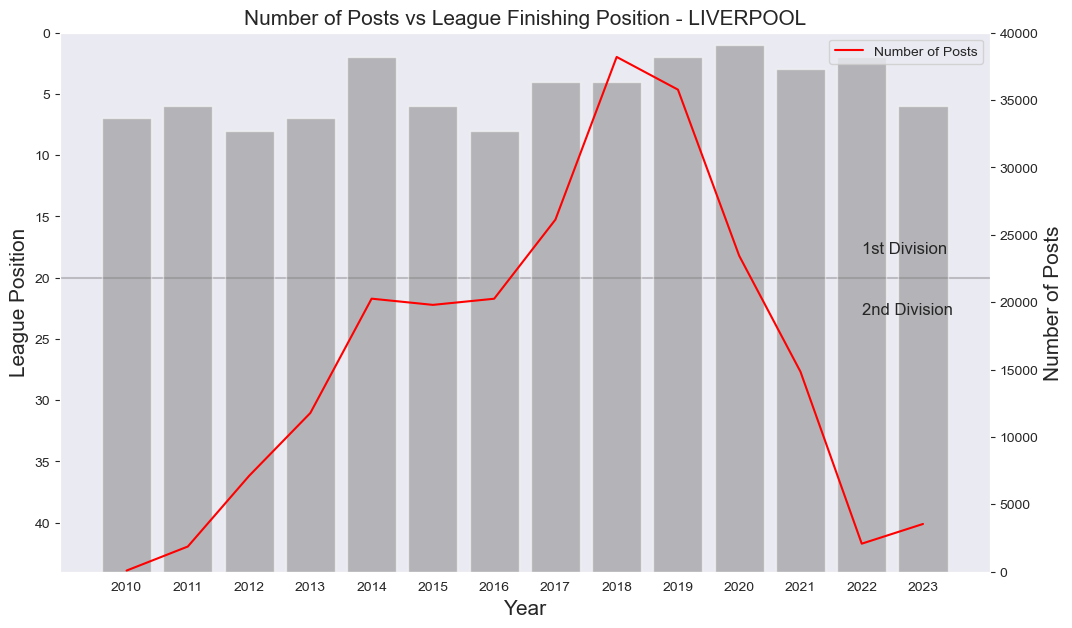

In [101]:
fig, axs = plt.subplots(1,figsize = (12, 7))

axs.bar(x = list(liv_positions.keys()),
        height = 44*np.ones(len(list(liv_positions.values())))-list(liv_positions.values()), 
        bottom= list(liv_positions.values()),
        color = 'grey',
        alpha = 0.5,
        zorder = 10)
axs.set_ylim(44,0)
ax2 = axs.twinx()
ax2.grid(False)

sns.lineplot(x = liv_dict.keys(),
            y = liv_dict.values(),
            ax = ax2,
            color = 'red',
            label = 'Number of Posts'

            )
axs.set_xlabel('Year', fontsize=15)
axs.set_ylabel('League Position', fontsize = 15)
ax2.set_ylabel('Number of Posts', fontsize=15)
ax2.set_title('Number of Posts vs League Finishing Position - LIVERPOOL', fontsize=15)
ax2.set_ylim(0, 40000)
axs.axhline(20, alpha = 0.2, color = 'black')
axs.text('2022', 18, '1st Division', fontsize=12, zorder = 11)
axs.text('2022', 23, '2nd Division', fontsize=12, zorder = 11);

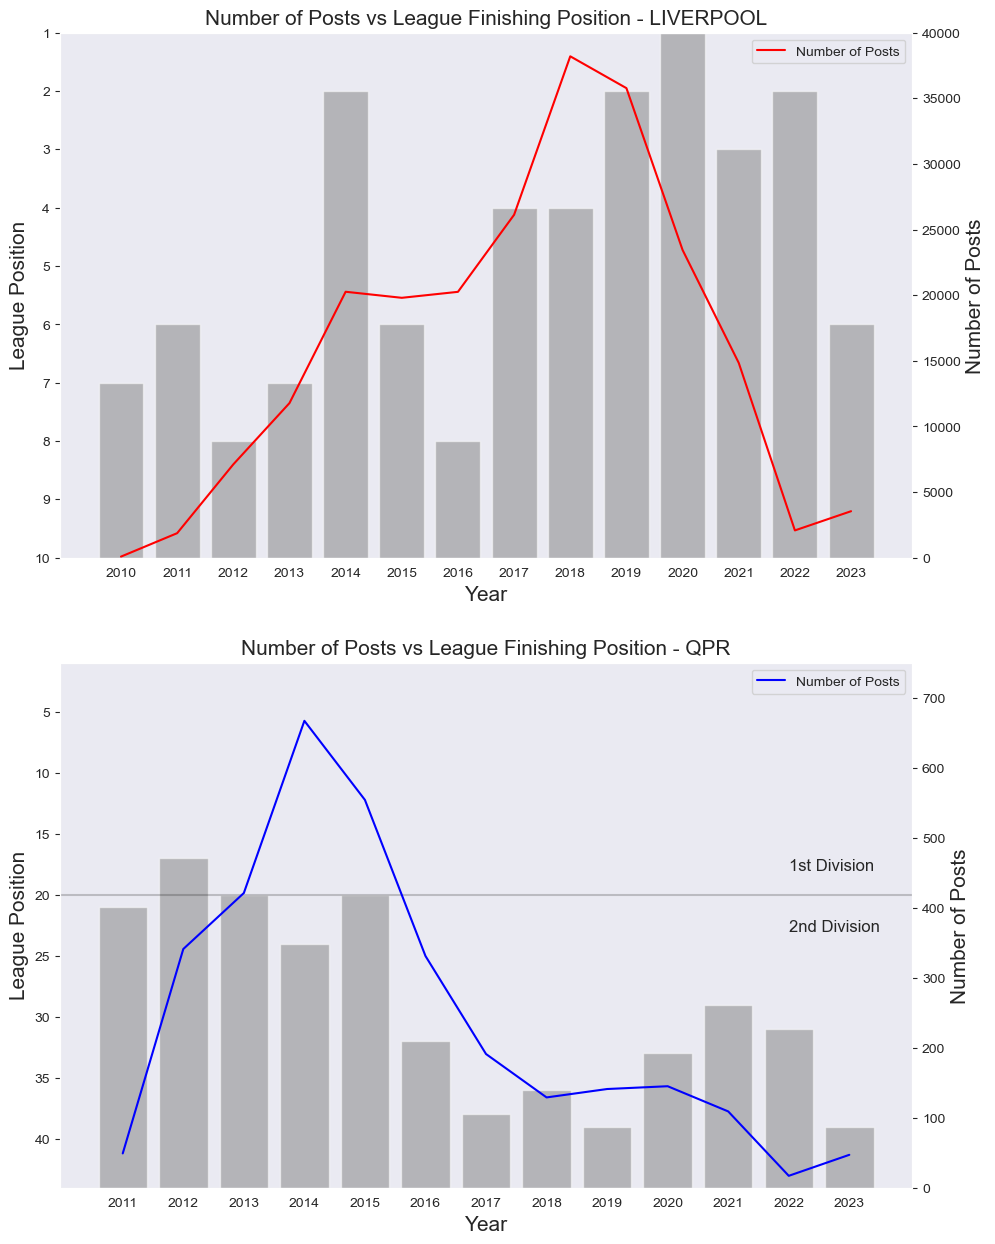

In [104]:
fig, axs = plt.subplots(2,figsize = (11, 15))

axs[0].bar(x = list(liv_positions.keys()),
        height = 10*np.ones(len(list(liv_positions.values())))-list(liv_positions.values()), 
        bottom= list(liv_positions.values()),
        color = 'grey',
        alpha = 0.5,
        zorder = 1
          )

axs[0].set_ylim(10,1)
ax2 = axs[0].twinx()
ax2.grid(False)

sns.lineplot(x = liv_dict.keys(),
            y = liv_dict.values(),
            ax = ax2,
            color = 'red',
            label = 'Number of Posts'
            )
axs[0].set_xlabel('Year', fontsize=15)
axs[0].set_ylabel('League Position', fontsize = 15)
ax2.set_ylabel('Number of Posts', fontsize=15)
ax2.set_title('Number of Posts vs League Finishing Position - LIVERPOOL', fontsize=15)
ax2.set_ylim(0, 40000)


axs[1].bar(x = list(qpr_positions.keys()),
        height = 44*np.ones(len(list(qpr_positions.values())))-list(qpr_positions.values()), 
        bottom= list(qpr_positions.values()),
        color = 'grey',
        alpha = 0.5,
        zorder = 1)
axs[1].set_ylim(44,1)
ax4 = axs[1].twinx()
ax4.grid(False)

sns.lineplot(x = qpr_dict.keys(),
            y = qpr_dict.values(),
            ax = ax4,
            color = 'blue',
            label = 'Number of Posts'

            )
axs[1].set_xlabel('Year', fontsize=15)
axs[1].set_ylabel('League Position', fontsize = 15)
axs[1].axhline(20, alpha = 0.2, color = 'black')
ax4.set_ylabel('Number of Posts', fontsize=15)
ax4.set_title('Number of Posts vs League Finishing Position - QPR', fontsize=15)
ax4.set_ylim(0, 750)
axs[1].text('2022', 18, '1st Division', fontsize=12)
axs[1].text('2022', 23, '2nd Division', fontsize=12);


In [113]:
qpr_p.length.mean()

46.229471674092935

In [112]:
liv_p.length.mean()

35.7348555493388

In [121]:
qpr_p.score.mean()

6.4901336728198595

In [122]:
liv_p.score.mean()

100.30687661524524

In [146]:
qpr_post_scores = {}
for year in qpr_p.date_posted.str[:4].sort_values(ascending = True).unique():
    qpr_post_scores[year] = qpr_p[qpr_p.date_posted.str[:4] == year].score.mean()
    

In [128]:
liv_post_scores = {}
for year in liv_p.date_posted.str[:4].sort_values(ascending = True).unique():
    liv_post_scores[year] = liv_p[liv_p.date_posted.str[:4] == year].score.mean()
    

In [147]:
qpr_post_scores

{'2011': 2.326530612244898,
 '2012': 3.067448680351906,
 '2013': 4.330166270783848,
 '2014': 6.275862068965517,
 '2015': 6.98014440433213,
 '2016': 6.495468277945619,
 '2017': 6.481675392670157,
 '2018': 7.48062015503876,
 '2019': 9.652482269503546,
 '2020': 12.441379310344828,
 '2021': 16.24770642201835,
 '2022': 1.0,
 '2023': 1.0638297872340425}

In [129]:
liv_post_scores

{'2010': 5.223529411764706,
 '2011': 10.43101604278075,
 '2012': 16.348376212568535,
 '2013': 23.614209320091675,
 '2014': 27.115080931701538,
 '2015': 33.10614553350502,
 '2016': 54.23111857044131,
 '2017': 72.5779181017987,
 '2018': 125.52255058503259,
 '2019': 160.83148391424658,
 '2020': 181.96575108760555,
 '2021': 212.10914235666644,
 '2022': 1.1508889956751562,
 '2023': 2.209650112866817}

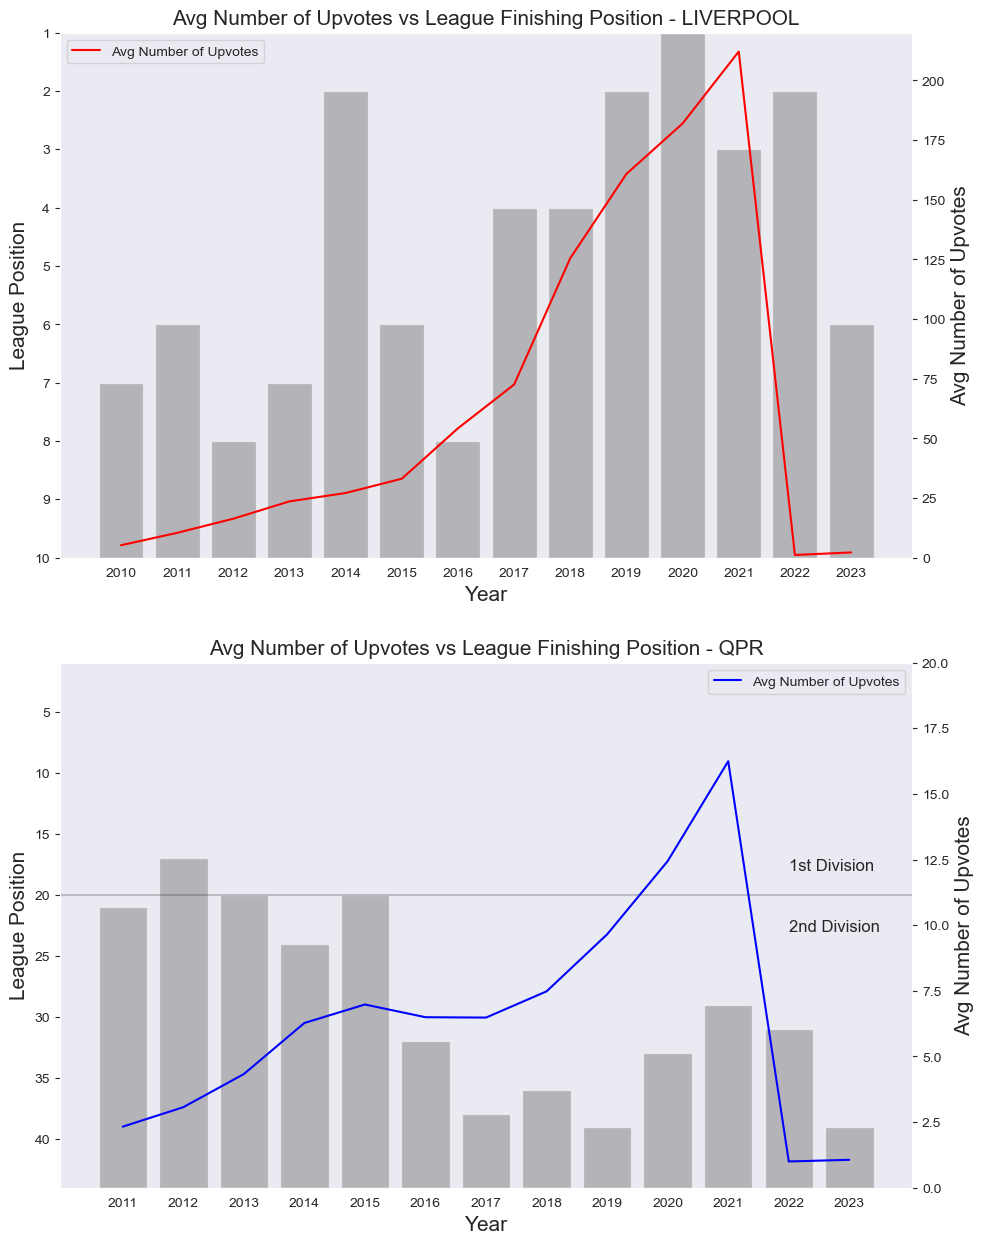

In [166]:
fig, axs = plt.subplots(2,figsize = (11, 15))


axs[0].bar(x = list(liv_positions.keys()),
        height = 10*np.ones(len(list(liv_positions.values())))-list(liv_positions.values()), 
        bottom= list(liv_positions.values()),
        color = 'grey',
        alpha = 0.5,
        zorder = 1
          )

axs[0].set_ylim(10,1)
ax2 = axs[0].twinx()
ax2.grid(False)

sns.lineplot(x = liv_post_scores.keys(),
            y = liv_post_scores.values(),
            ax = ax2,
            color = 'red',
            label = 'Avg Number of Upvotes'
            )
axs[0].set_xlabel('Year', fontsize=15)
axs[0].set_ylabel('League Position', fontsize = 15)
ax2.set_ylabel('Avg Number of Upvotes', fontsize=15)
ax2.set_title('Avg Number of Upvotes vs League Finishing Position - LIVERPOOL', fontsize=15)
ax2.set_ylim(0, 220)


axs[1].bar(x = list(qpr_positions.keys()),
        height = 44*np.ones(len(list(qpr_positions.values())))-list(qpr_positions.values()), 
        bottom= list(qpr_positions.values()),
        color = 'grey',
        alpha = 0.5,
        zorder = 1)
axs[1].set_ylim(44,1)
ax4 = axs[1].twinx()
ax4.grid(False)

sns.lineplot(x = qpr_post_scores.keys(),
            y = qpr_post_scores.values(),
            ax = ax4,
            color = 'blue',
            label = 'Avg Number of Upvotes'

            )
axs[1].set_xlabel('Year', fontsize=15)
axs[1].set_ylabel('League Position', fontsize = 15)
axs[1].axhline(20, alpha = 0.2, color = 'black')
ax4.set_ylabel('Avg Number of Upvotes', fontsize=15)
ax4.set_title('Avg Number of Upvotes vs League Finishing Position - QPR', fontsize=15)
ax4.set_ylim(0, 20)
axs[1].text('2022', 18, '1st Division', fontsize=12)
axs[1].text('2022', 23, '2nd Division', fontsize=12);


In [134]:
liv_post_lengths = {}
for year in liv_p.date_posted.str[:4].sort_values(ascending = True).unique():
    liv_post_lengths[year] = liv_p[liv_p.date_posted.str[:4] == year].length.mean()

In [162]:
del liv_post_lengths['2010']

In [163]:
liv_post_lengths

{'2011': 38.006951871657755,
 '2012': 42.95768311542247,
 '2013': 39.18742042271454,
 '2014': 45.32328266877221,
 '2015': 46.313285865777914,
 '2016': 48.465149570540035,
 '2017': 40.42636815920398,
 '2018': 30.307070125382822,
 '2019': 27.632808787768678,
 '2020': 26.754926213426597,
 '2021': 27.466617260661593,
 '2022': 24.082652570879386,
 '2023': 27.973476297968396}

In [143]:
qpr_post_lengths = {}
for year in qpr_p.date_posted.str[:4].sort_values(ascending = True).unique():
    qpr_post_lengths[year] = qpr_p[qpr_p.date_posted.str[:4] == year].length.mean()

In [144]:
qpr_post_scores

{'2011': 31.3265306122449,
 '2012': 38.29325513196481,
 '2013': 48.565320665083135,
 '2014': 49.749625187406295,
 '2015': 41.40613718411552,
 '2016': 34.82779456193354,
 '2017': 64.59162303664921,
 '2018': 34.41860465116279,
 '2019': 67.43262411347517,
 '2020': 69.46896551724137,
 '2021': 33.642201834862384,
 '2022': 36.294117647058826,
 '2023': 40.8936170212766}

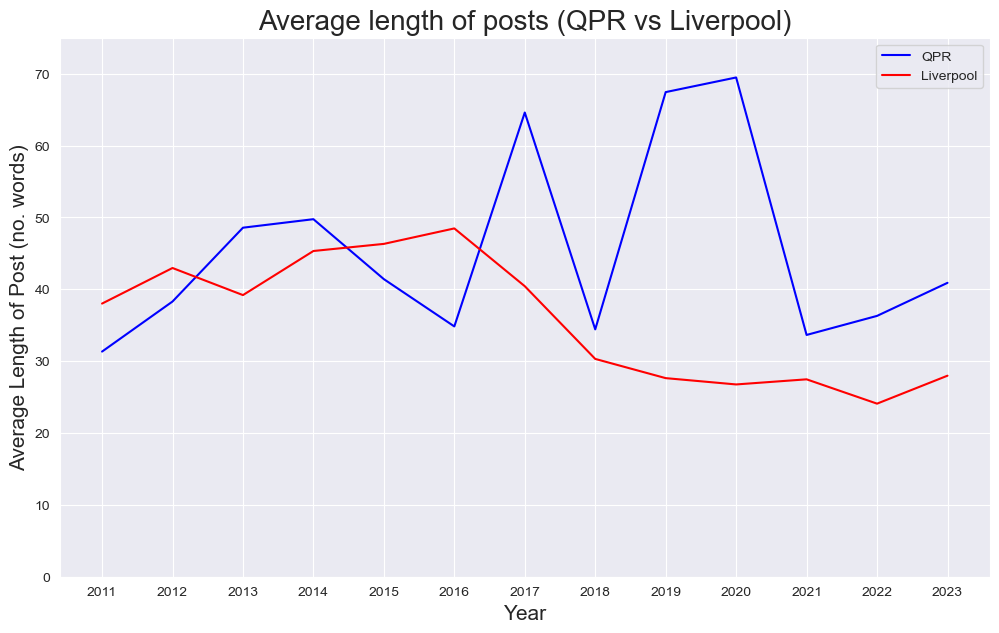

In [174]:
sns.set_style('darkgrid')
fig, axs = plt.subplots(figsize = (12, 7))

sns.lineplot(x = qpr_post_lengths.keys(),
            y = qpr_post_lengths.values(),
            ax = axs,
            color = 'blue',
            label = 'QPR')
sns.lineplot(x = liv_post_lengths.keys(),
            y = liv_post_lengths.values(),
            ax = axs,
            color = 'red',
            label = 'Liverpool')
axs.set_ylim(0,75)
axs.set_xlabel('Year', fontsize = 15)
axs.set_ylabel('Average Length of Post (no. words)', fontsize=15)
axs.set_title('Average length of posts (QPR vs Liverpool)', fontsize=20);


In [176]:
qpr.head()

,subreddit,body,length,post_date
0,superhoops,Calls him a disgrace but still says he's a goo...,24,2011-09-26
1,superhoops,BBC - Football Tactics: Goal-shy QPR in need o...,11,2011-09-26
2,superhoops,"26 Sept 2011: 'If you are hurting inside, you ...",37,2011-09-26
3,superhoops,"This is a great resource, which I've been usin...",34,2011-09-26
4,superhoops,Warnock unhappy with refereeing decisions in g...,12,2011-09-26


In [179]:
liv = liv_p[['subreddit', 'body', 'length', 'date_posted']]

In [181]:
qpr.rename(columns = {
    'post_date' : 'date_posted'
}, inplace = True)

/var/folders/5h/p8nqld_13hg44lctlhg2ns8c0000gn/T/ipykernel_5585/3920453654.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qpr.rename(columns = {


In [182]:
qpr

,subreddit,body,length,date_posted
0,superhoops,Calls him a disgrace but still says he's a goo...,24,2011-09-26
1,superhoops,BBC - Football Tactics: Goal-shy QPR in need o...,11,2011-09-26
2,superhoops,"26 Sept 2011: 'If you are hurting inside, you ...",37,2011-09-26
3,superhoops,"This is a great resource, which I've been usin...",34,2011-09-26
4,superhoops,Warnock unhappy with refereeing decisions in g...,12,2011-09-26
...,...,...,...,...
8470,superhoops,Gareth Ainsworth: EFL financial woes not helpe...,12,2023-03-22
8471,superhoops,get yourself a decent striker as soon as possi...,9,2023-03-25
8472,superhoops,"done a few, unlike irl dykes is actually quite...",46,2023-03-25
8474,superhoops,I’d start with all of them and see where that ...,12,2023-03-25


In [ ]:
liv_p.to_csv('../4-preprocessing/liv.csv', index = False)
qpr.to_csv('../4-preprocessing/qpr.csv', index = False)